In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [3]:
bjp_search_list = ["bjp","@BJP4India","@narendramodi","#BJPwinningUP","@AmitShah"]
bjp_search_list_2 = ["@myogiadityanath","yogi","@BJP4TamilNadu","@BJP4UP","@JPNadda","@CHARANJITCHANNI","channi"]
aap_search_list = ["aam aadmi party","#AAP","@AamAadmiParty","kejriwal","#ArvindKejriwal","@AAPPunjab","#KejriwalVsAll","@ArvindKejriwal","#AAPdePaap","@msisodia","@BhagwantMann"]
inc_search_list = ["@INCIndia","@RahulGandhi","Rahul Gandhi","@INCPunjab","@priyankagandhi","@INCUttarPradesh"]
general_search_list = ["#PunjabElections2022","#UPElections2022","#UttarPradeshElections2022"]
bsp_search_list = ["@Mayawati","@BSPIndia","bahujan samaj","mayawati","@AnandAkash_BSP","@satishmisrabsp"]
samajwadi_search_list = ["@yadavakhilesh","samajwadi","@samajwadiparty","shivpal yadav","#MulayamSinghYadav"]

In [16]:
df_bjp = pd.read_csv("Datasets/Testing/bjp_all.csv")
df_inc = pd.read_csv("Datasets/Testing/inc.csv")
df_bsp = pd.read_csv("Datasets/Testing/bsp.csv")
df_samaj = pd.read_csv("Datasets/Testing/samajwadi.csv")
df_general = pd.read_csv("Datasets/Testing/general.csv")
df_aap = pd.read_csv("Datasets/Testing/aap.csv")
df_list = [df_bjp,df_inc,df_aap,df_samaj,df_bsp,df_general]

name = ["BJP","INC","AAP","Samajwadi","BSP","General"]

In [17]:
print(len(df_bjp.index)+len(df_inc.index)+len(df_bsp.index)+len(df_samaj.index)+len(df_aap.index)+len(df_general.index))

425558


In [18]:
length_list = [len(df.index) for df in df_list]


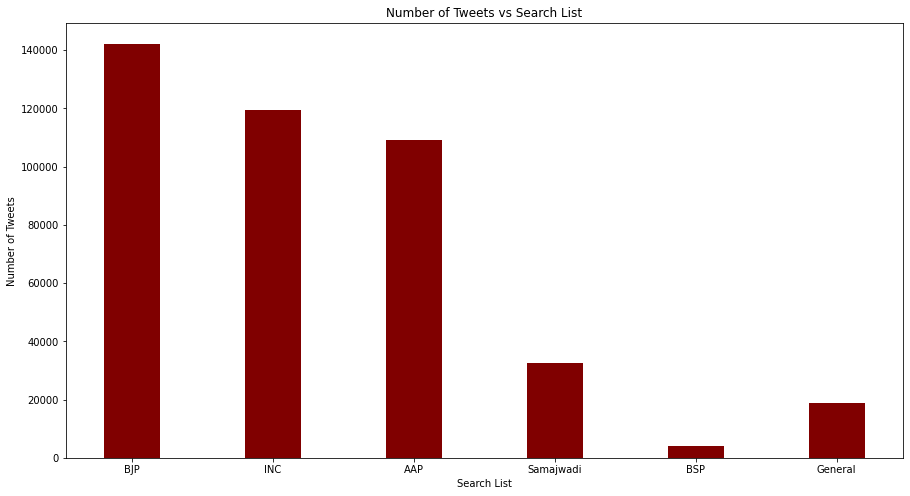

In [19]:
fig = plt.figure(figsize = (15, 8))
 
# creating the bar plot
plt.bar(name, length_list, color ='maroon',
        width = 0.4)
 
plt.xlabel("Search List")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets vs Search List")
plt.savefig("searchtweets.png",dpi=1000)
plt.show()

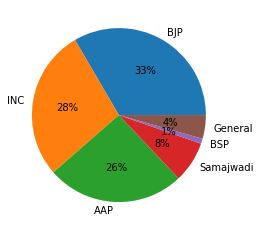

In [20]:
plt.pie(length_list, labels = name,autopct='%1.0f%%')
plt.savefig("searchpie.png",dpi=1000)

In [203]:
bjp_tweets = []
inc_tweets = []
aap_tweets = []
misc_tweets = []
bsp_tweets = []
samajwadi_tweets = []

In [204]:
df = df_bjp
df = df[df['query']!="@BJP4TamilNadu"]
tweets = df['tweet']

UP_df = pd.DataFrame()
UP_query = ["#BJPwinningUP","@myogiadityanath","yogi","@BJP4UP"]
Punjab_query = ["@CHARANJITCHANNI","channi"]
Punjab_df = pd.DataFrame()
rest_df = pd.DataFrame()

for q in UP_query:
    UP_df = pd.concat([UP_df,df[df['query']==q]])
for q in Punjab_query:
    Punjab_df = pd.concat([Punjab_df,df[df['query']==q]])

rest_df = df[~df['query'].isin(UP_query+Punjab_query)]

In [205]:
print(len(UP_df.index))
print(len(Punjab_df.index))
print(len(rest_df.index))

91669
16181
23728


In [206]:
def hash(arr):
    temp = {}
    for a in arr:
        temp[a] = 1
    return temp

In [207]:
UP_list = ["yogi","#bjpwinningup","up","uttar","pradesh","adityanath","#upelections2022","#uttarpradeshelections2022"]
# UP_list = hash(UP_list)
Punjab_list = ["punjab","#punjabelections2022","channi","@charanjitchanni","charanjit","#punjab"]
# Punjab_list = hash(Punjab_list)
# loop = tqdm(total=len(rest_df.index))

# temp_df = pd.DataFrame()
for i,row in tqdm(rest_df.iterrows(),total=len(rest_df.index)):
    start = time.time()
    # loop.update(1)
    tweet = row['tweet'].lower()
    words = tweet.split()
    for w in words:
        if w in UP_list:
            rest_df.loc[i, 'query'] = "BJP_UP"
            break
        elif w in Punjab_list:
            rest_df.loc[i, 'query'] = "BJP_Punjab"
            break
        else:
            rest_df.loc[i, 'query'] = "REST"
            # print("x")
        # print(row.query)

# rest_df = temp_df


100%|██████████| 23728/23728 [03:17<00:00, 119.93it/s]


In [208]:
UP_query = ["BJP_UP"]
Punjab_query = ["BJP_Punjab"]
rest_query = ["REST"]

for q in UP_query:
    UP_df = pd.concat([UP_df,rest_df[rest_df['query']==q]])
for q in Punjab_query:
    Punjab_df = pd.concat([Punjab_df,rest_df[rest_df['query']==q]])

rest_df = rest_df[rest_df['query'].isin(rest_query)]

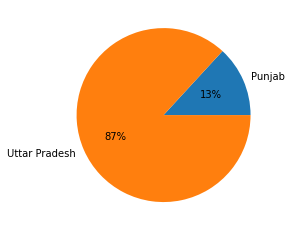

In [216]:
state = ["Punjab","Uttar Pradesh"]
length = [len(Punjab_df.index),len(UP_df.index)]
plt.pie(length, labels = state,autopct='%1.0f%%')
plt.savefig("categorize.png",dpi=1000)

In [209]:
print(len(UP_df.index))
print(len(Punjab_df.index))
print(len(rest_df.index))

107182
16240
8156


In [213]:
rest_df.to_csv("Datasets/Testing/rest_bjp.csv",index=False)
UP_df.to_csv("Datasets/Testing/up_bjp.csv",index=False)
Punjab_df.to_csv("Datasets/Testing/punjab_bjp.csv",index=False)

In [210]:
print(len(df.index))
print(len(bjp_tweets))
print(len(inc_tweets))
print(len(bsp_tweets))
print(len(aap_tweets))
print(len(samajwadi_tweets))
print(len(misc_tweets))

131578
0
0
0
0
0
0


In [28]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [29]:
df_up = pd.read_csv("UP_predictions.csv")
df_punjab = pd.read_csv("Punjab_predictions.csv")

In [30]:
import seaborn as sns
# sns.set(
#     font='sans-serif', 
#     style='white', 
#     font_scale=1.4, 
#     palette='muted',
#     rc = {
#     "lines.linewidth": 2, 
#     "lines.markersize":6,
#    }
# )
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df_up

,sentiment_method,prediction_method,BJP Prediction,Samajwadi prediction,BSP prediction
0,vader,0,0.746065,0.225848,0.028087
1,vader,1,0.728468,0.238770,0.032762
2,vader,2,0.128659,0.541414,0.521235
3,vader,3,0.305121,0.330371,0.364508
4,vader,4,0.328458,0.322428,0.349114
5,vader,5,0.785390,0.189421,0.025189
6,vader,6,0.307834,0.370939,0.321227
7,bnb,0,0.746065,0.225848,0.028087
8,bnb,1,0.770751,0.193785,0.035465
9,bnb,2,0.152147,0.508057,0.534114


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

In [62]:
def plot(df_up,y,state):
        fig = plt.figure(figsize = (20, 10))

        # creating the bar plot
        name = df_up.loc[df_up['prediction_method'] == y, "sentiment_method"]
        if (state == "UP"):
                df_1 = df_up
                m1 = df_up.loc[df_up['prediction_method'] == y, "BJP Prediction"]
                m2 = df_up.loc[df_up['prediction_method'] == y, "Samajwadi prediction"]
                m3 = df_up.loc[df_up['prediction_method'] == y, "BSP prediction"]
                tags = ["BJP","Samajwadi","BSP"]
        else:
                m1 = df_up.loc[df_up['prediction_method'] == y, "BJP Prediction"]
                m2 = df_up.loc[df_up['prediction_method'] == y, "INC Prediction"]
                m3 = df_up.loc[df_up['prediction_method'] == y, "AAP Prediction"]
                tags = ["BJP","INC","AAP"]

        # print(m1)
        # print(m2)
        # print(m3)

        x = np.arange(len(name))
        
        plt.bar(x-0.2, m1,
                width = 0.1, label = tags[0])
        
        plt.bar(x, m2, 
                width = 0.1, label = tags[1])

        plt.bar(x+0.2, m3, 
                width = 0.1, label = tags[2])

        plt.xticks(x, name)

        plt.xlabel("Sentiment Methods")
        plt.ylabel("Vote Share Prediction")
        plt.title(f"Number of Tweets vs Search List - {state}")
        plt.savefig(f"{y}_{state}.png",dpi=1000,bbox_inches = "tight")
        plt.legend()
        plt.show()

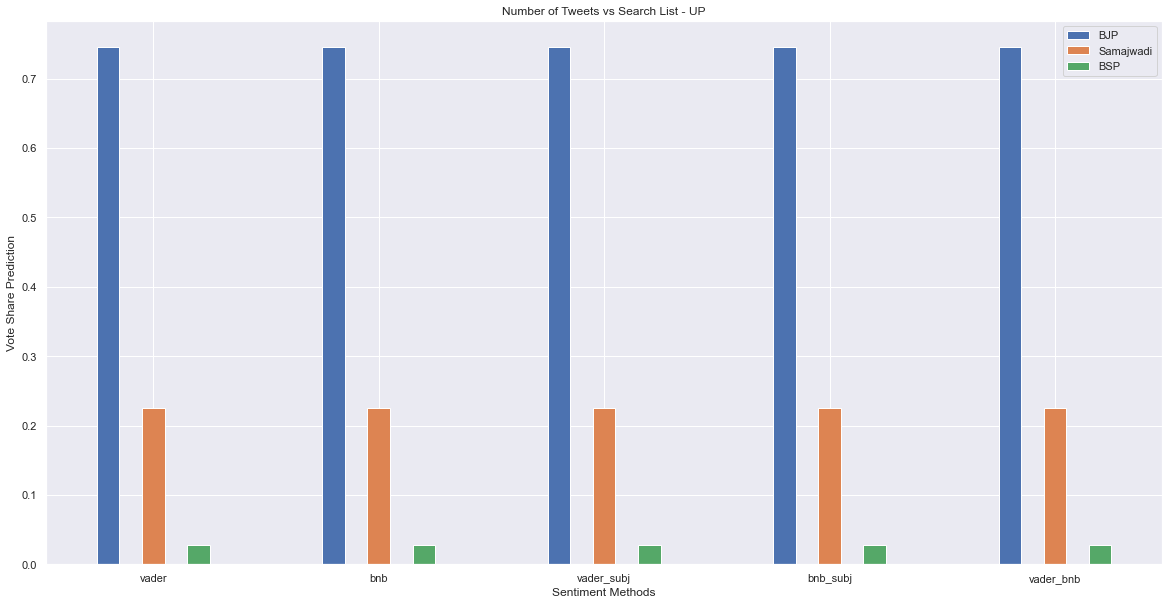

In [63]:
plot(df_up,0,"UP")

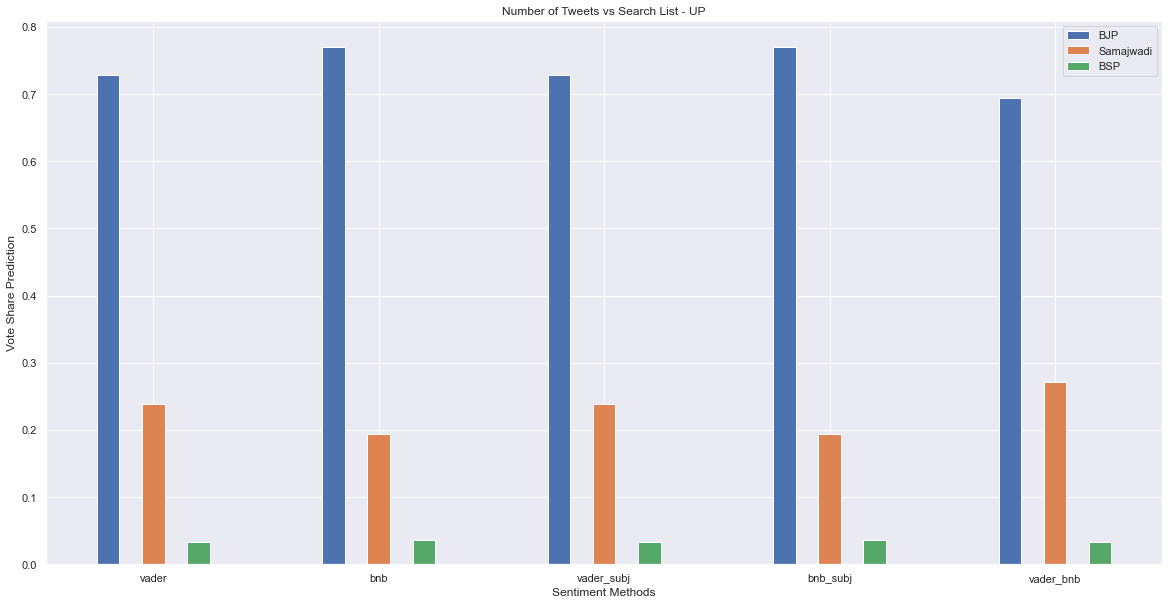

In [64]:
plot(df_up,1,"UP")

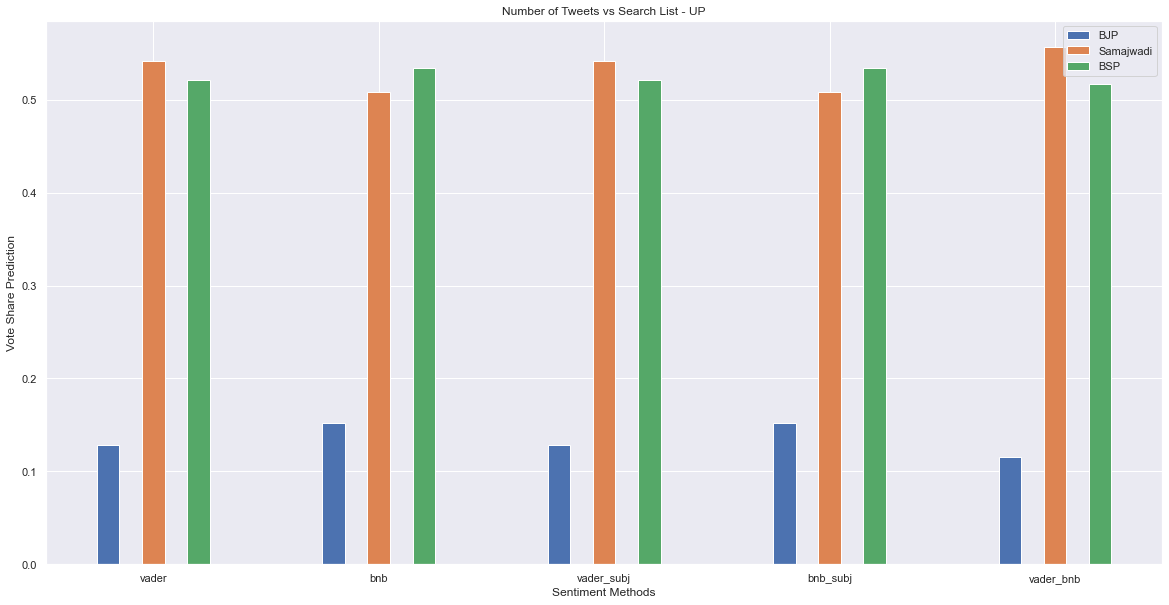

In [65]:
plot(df_up,2,"UP")

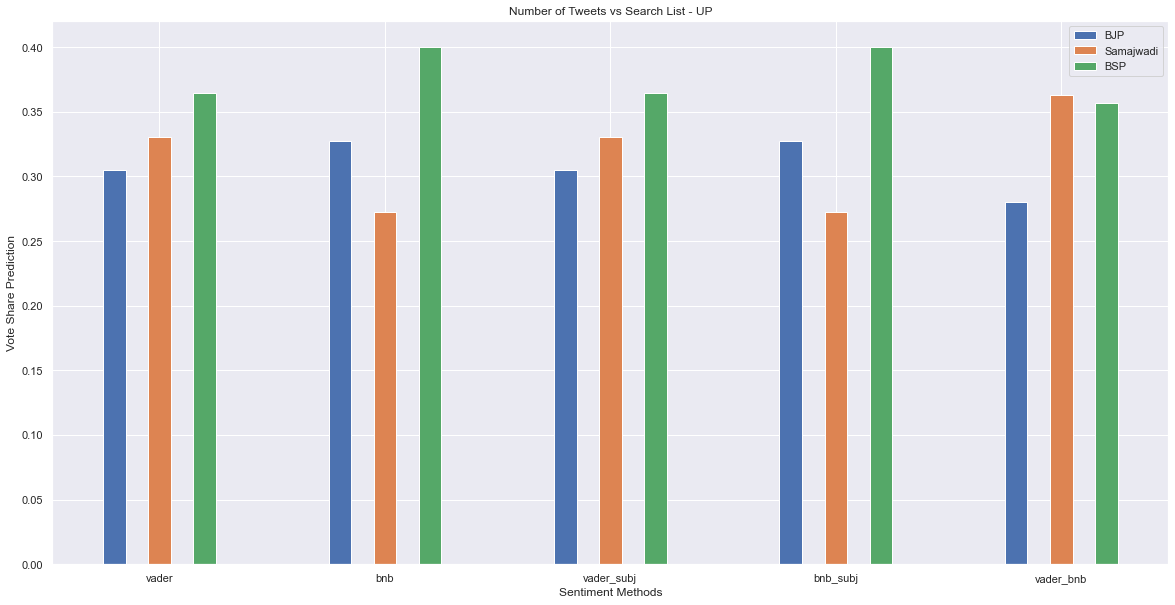

In [66]:
plot(df_up,3,"UP")

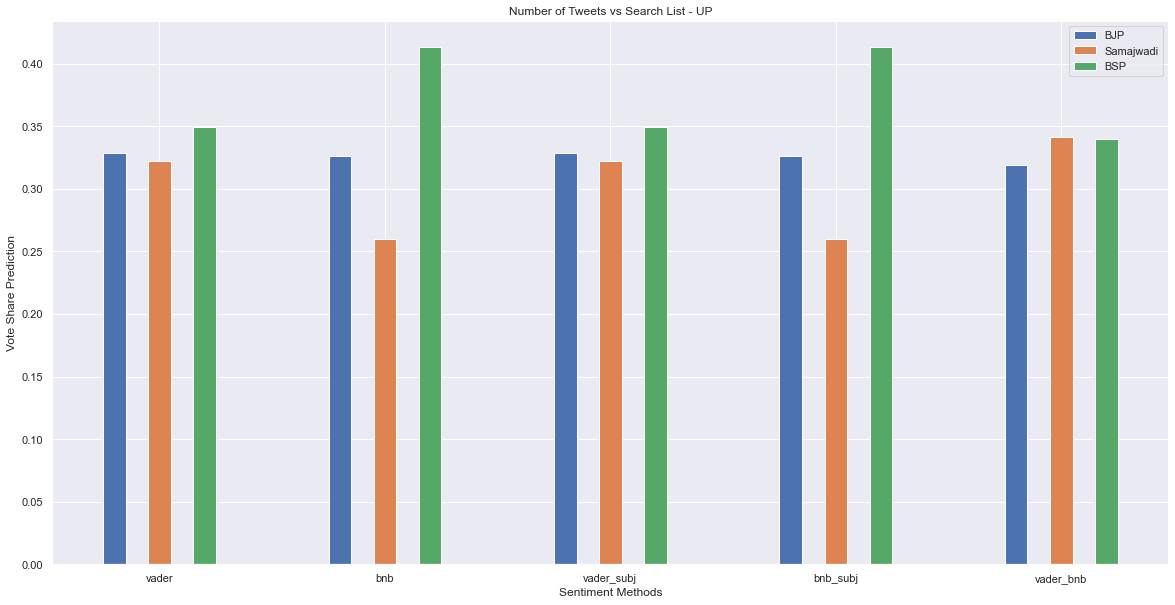

In [67]:
plot(df_up,4,"UP")

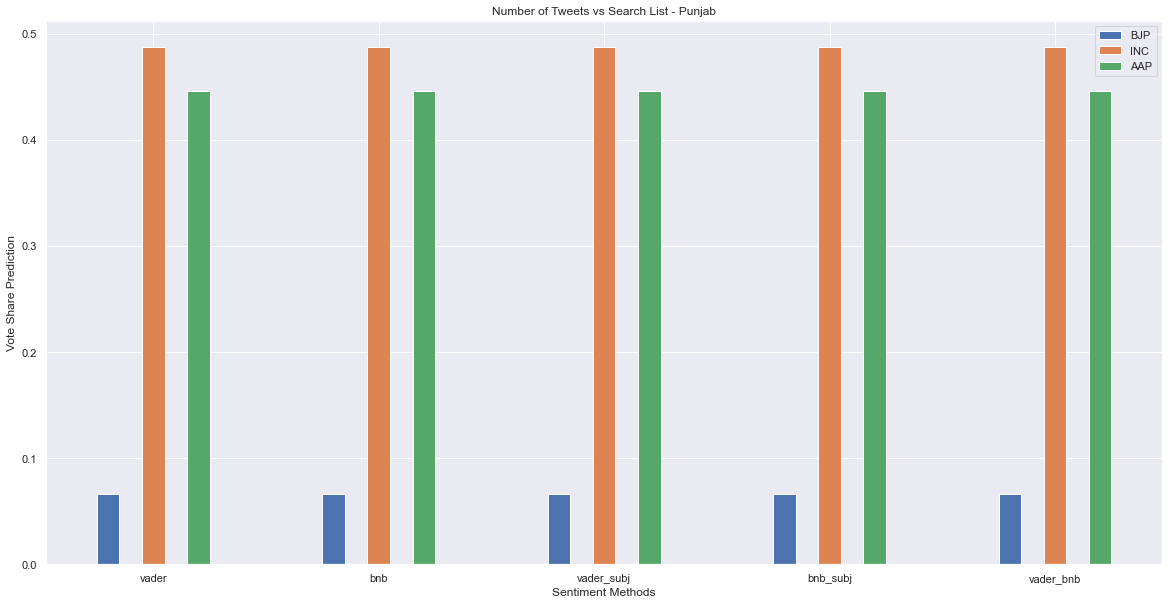

In [68]:
plot(df_punjab,0,"Punjab")

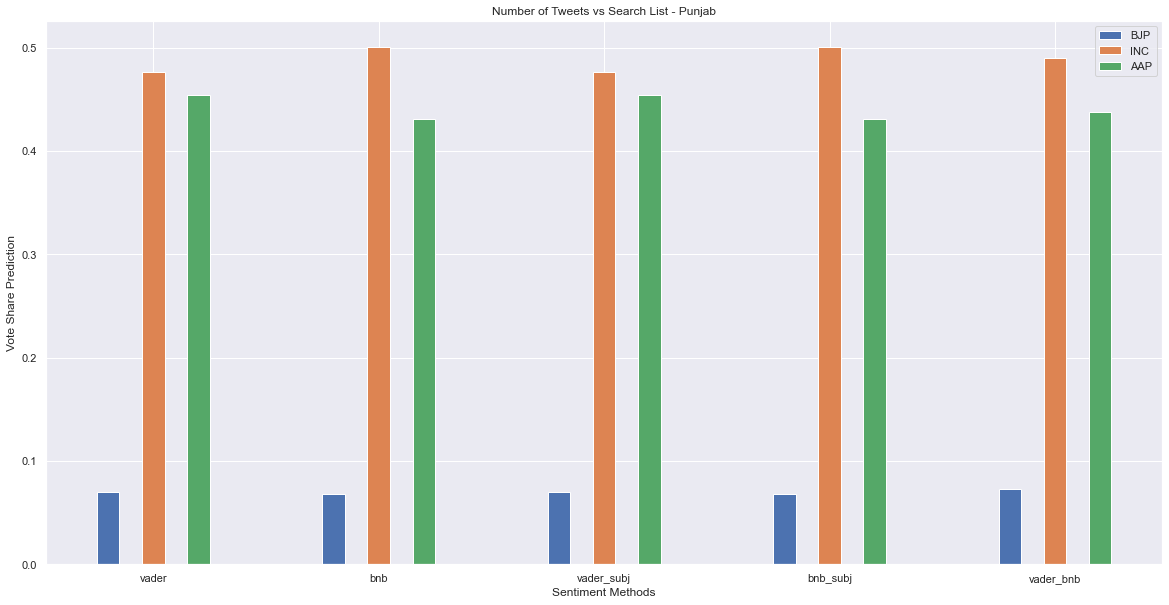

In [69]:
plot(df_punjab,1,"Punjab")

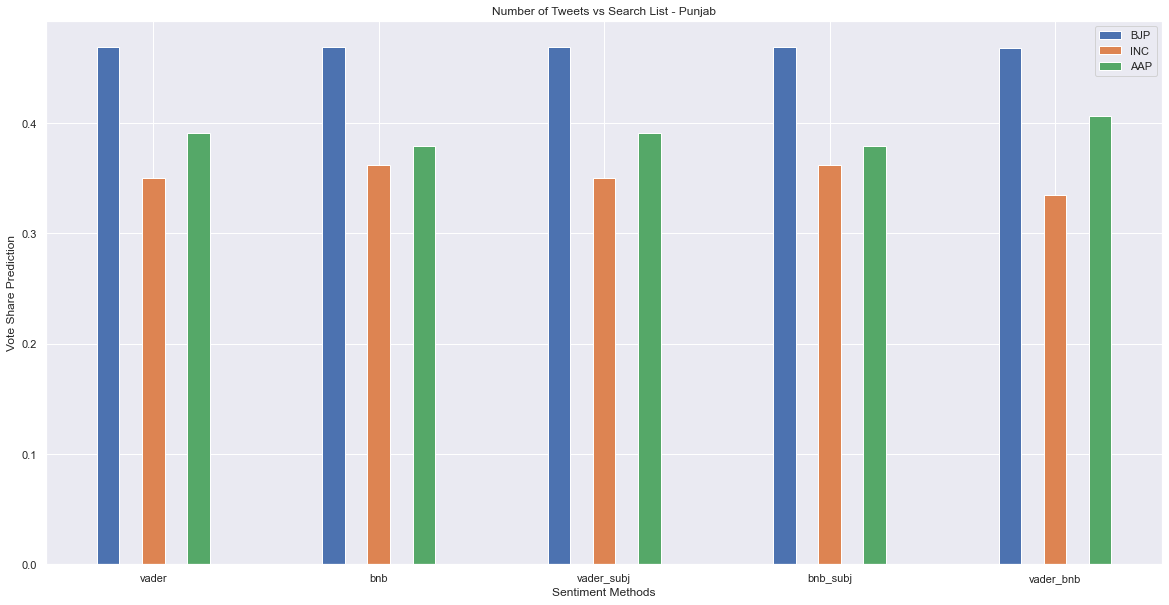

In [70]:
plot(df_punjab,2,"Punjab")

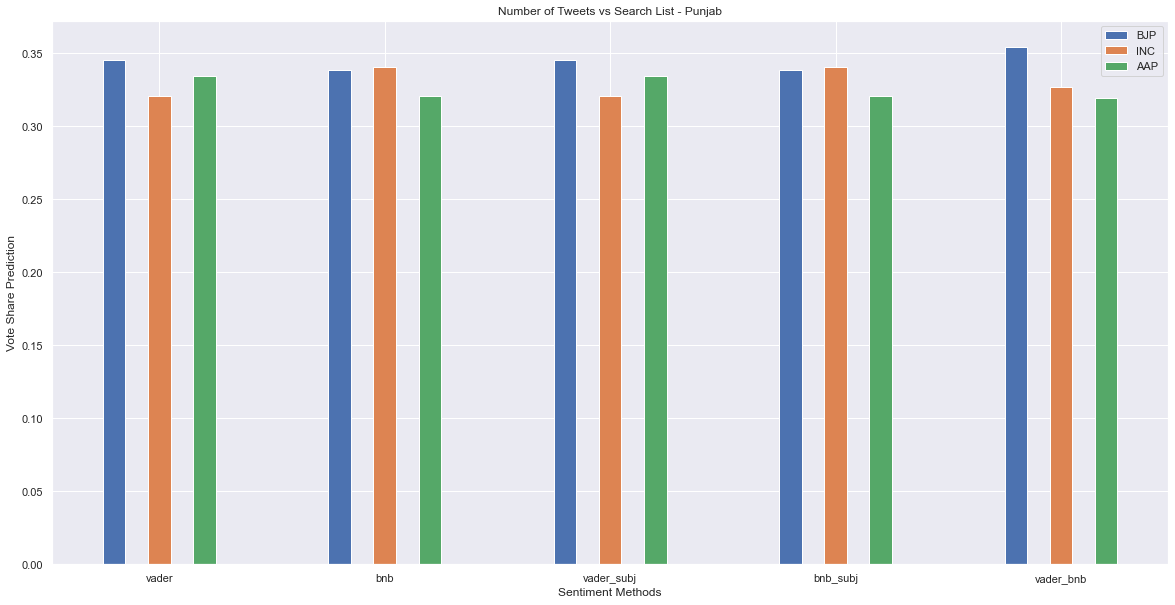

In [71]:
plot(df_punjab,3,"Punjab")

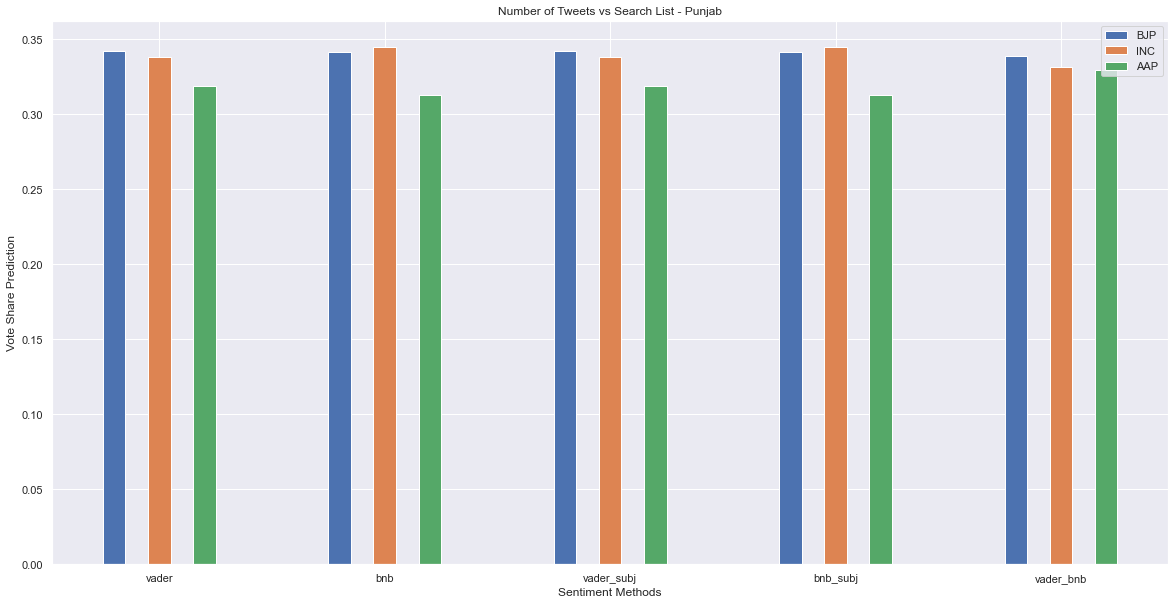

In [72]:
plot(df_punjab,4,"Punjab")

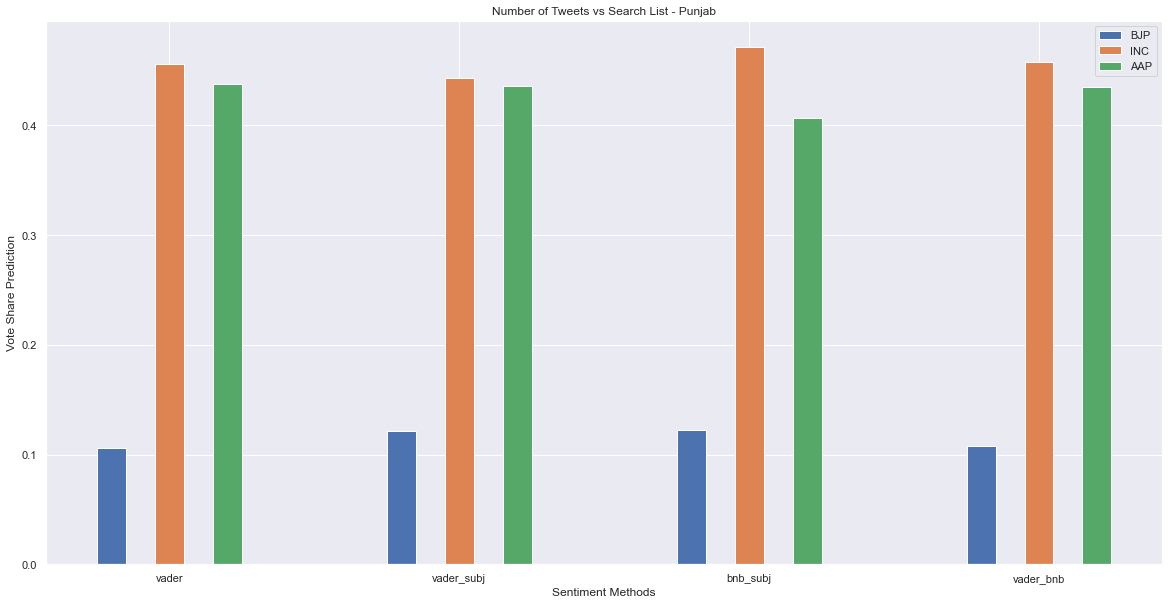

In [73]:
plot(df_punjab,5,"Punjab")

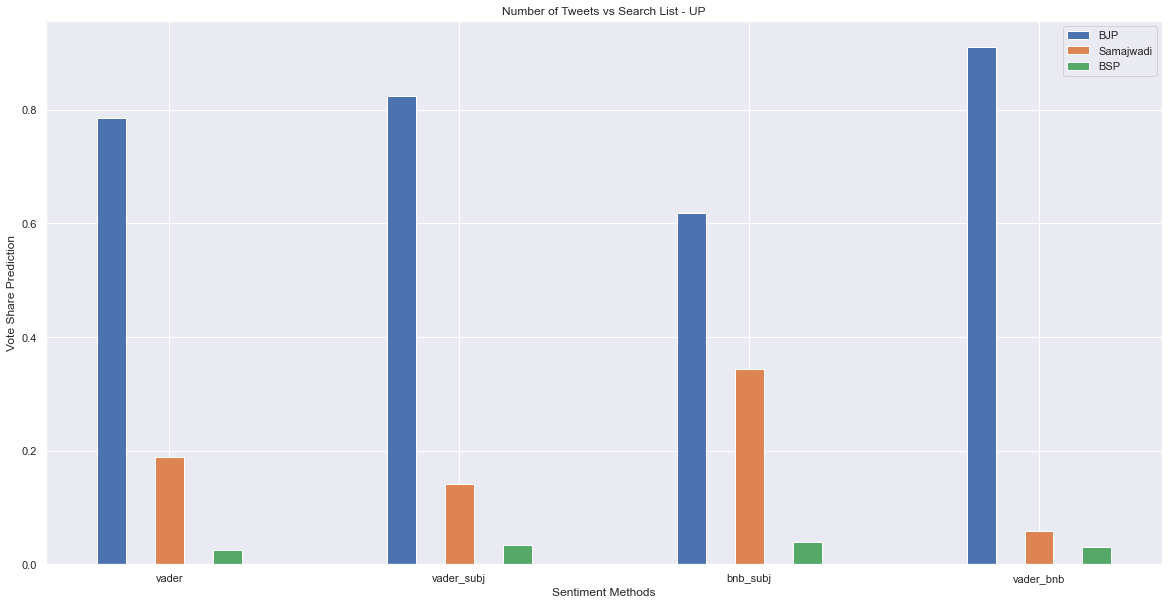

In [74]:
plot(df_up,5,"UP")